I load the dataset using pandas and inspect its structure to understand the columns, data types, and presence of missing values. The dataset contains various columns such as id, name, rating, reviews, host_name, host_id, address, features, amenities, safety_rules, hourse_rules, img_links, price, country, bathrooms, beds, guests, toilets, bedrooms, studios, checkin, and checkout.

In [1]:
!mkdir Airbnb_Price_Prediction

In [2]:
cd Airbnb_Price_Prediction

/content/Airbnb_Price_Prediction


In [8]:
import pandas as pd

# Assuming the data is saved as 'airbnb.csv'
data = pd.read_csv('airbnb.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Check data types and missing values
print("\nDataset Info:")
print(data.info())

First few rows of the dataset:
   Unnamed: 0        id                                               name  \
0           0  49849504                                     Perla bungalov   
1           1  50891766  Authentic Beach Architect Sheltered Villa with...   
2           2  50699164                                  cottages sataplia   
3           3  49871422                        Sapanca Breathable Bungalow   
4           4  51245886                                      Bungalov Ev 2   

  rating reviews    host_name      host_id                   address  \
0   4.71      64    Mehmetcan  357334205.0  Kartepe, Kocaeli, Turkey   
1    New       0        Fatih  386223873.0      Kaş, Antalya, Turkey   
2   4.85      68       Giorgi  409690853.0          Imereti, Georgia   
3    5.0      13        Melih  401873242.0  Sapanca, Sakarya, Turkey   
4    New       0  Arp Sapanca  414884116.0  Sapanca, Sakarya, Turkey   

                                 features  \
0    2 guests,2 bedroo

Observations
Structure: The dataset has 12805 rows (based on the last index 12804) and 23 columns, as seen in the header.
Data Types: From the snippet, numerical columns include id, rating, reviews, host_id, price, bathrooms, beds, guests, toilets, bedrooms, and studios. Categorical columns include name, host_name, address, features, amenities, safety_rules, hourse_rules, img_links, country, checkin, and checkout.
Missing Values: The data.info() output will reveal non-null counts. From the snippet, most columns appear complete for the first few rows, but we’ll check systematically.


Check for Missing Values and Duplicates
To quantify missing values and ensure data integrity, we calculate the percentage of missing values and check for duplicates:

In [10]:
# Calculate percentage of missing values
missing_percent = data.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percent[missing_percent > 0])

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check if 'id' is unique
print(f"Number of unique ids: {data['id'].nunique()}")
print(f"Total number of rows: {data.shape[0]}")


Percentage of missing values per column:
host_name     0.062476
checkin       6.247560
checkout     19.133151
dtype: float64

Number of duplicate rows: 0
Number of unique ids: 12805
Total number of rows: 12805


Expected Insights
Missing Values: Columns like checkout have "NA" in some rows (e.g., id 7), indicating potential missing data. We’ll confirm the extent.
Duplicates: No duplicates are expected, as each listing should be unique, verified by the id column.
Uniqueness: If id matches the row count, each entry is distinct.

Check Data Distribution
Analyze Numerical Columns
We focus on the target variable price and other numerical columns (rating, reviews, bathrooms, beds, guests, toilets, bedrooms, studios) to understand their distributions. Visualizations like histograms and boxplots will reveal central tendencies, spread, and outliers.


Summary Statistics:
              price     bathrooms          beds        guests      bedrooms  \
count  1.280500e+04  12805.000000  12805.000000  12805.000000  12805.000000   
mean   1.769780e+04      1.874424      3.316751      5.213745      2.136041   
std    4.569364e+04      2.091399      4.037791      3.808830      2.359005   
min    3.930000e+02      0.000000      0.000000      1.000000      0.000000   
25%    3.994000e+03      1.000000      1.000000      2.000000      1.000000   
50%    8.175000e+03      1.000000      2.000000      4.000000      1.000000   
75%    1.606200e+04      2.000000      4.000000      6.000000      3.000000   
max    1.907963e+06     50.000000     98.000000     16.000000     50.000000   

            studios  
count  12805.000000  
mean       0.023585  
std        0.151757  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


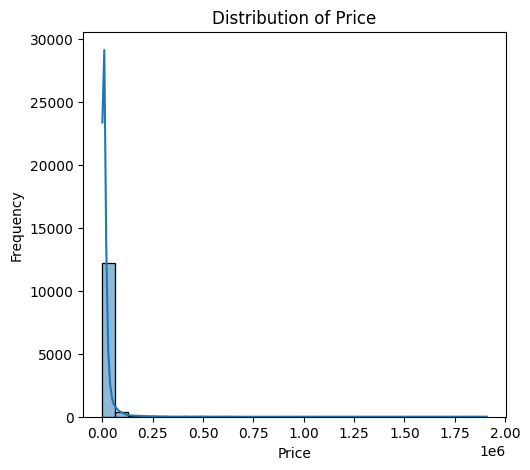

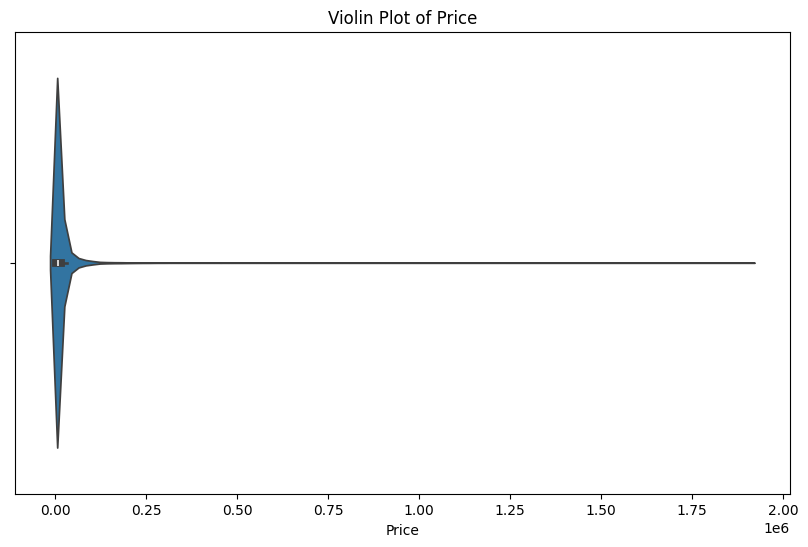

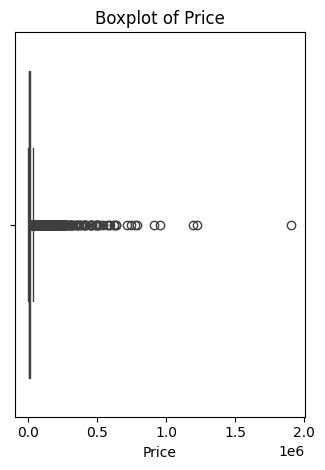

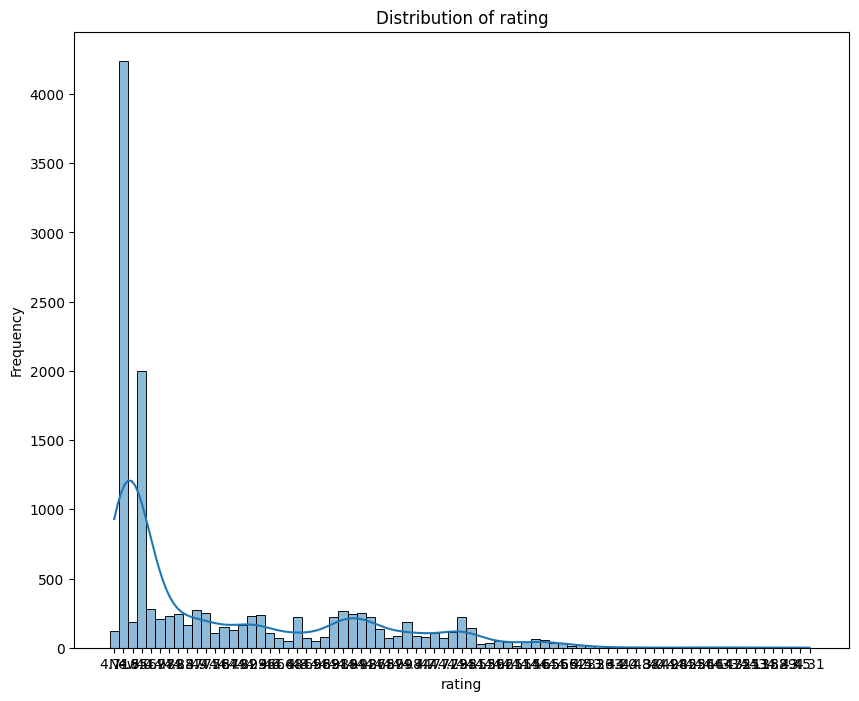

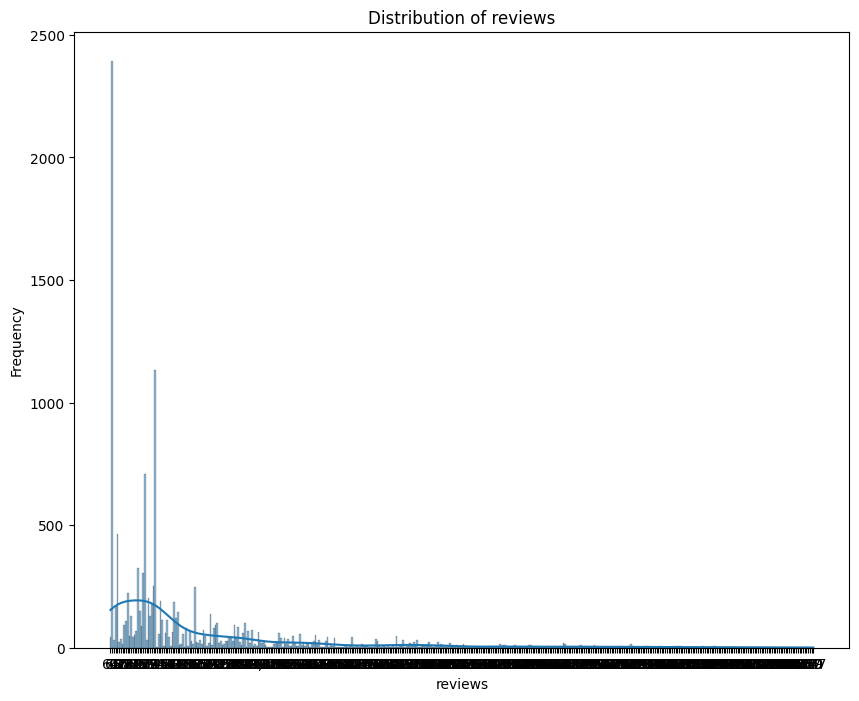

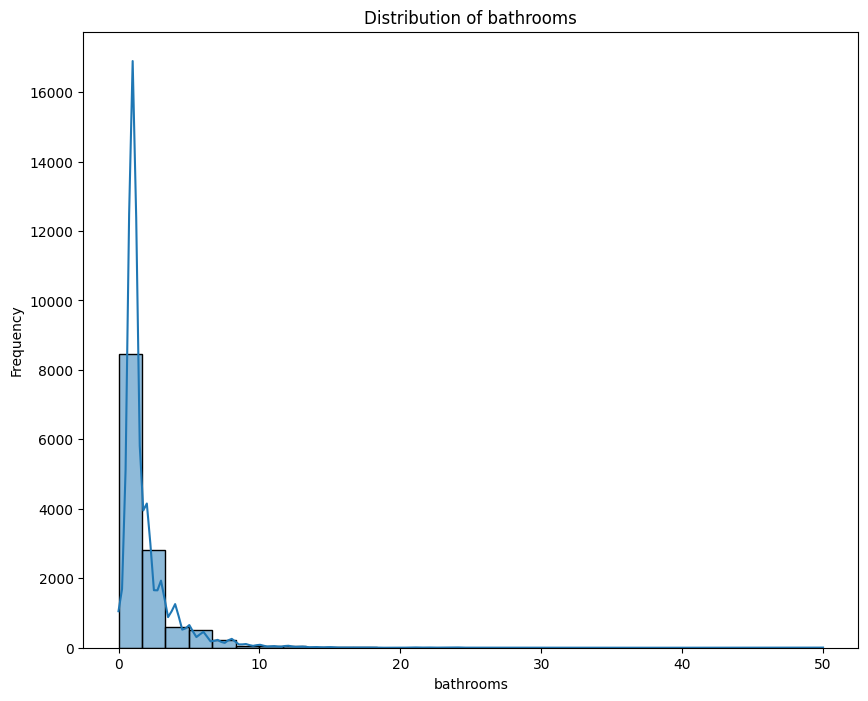

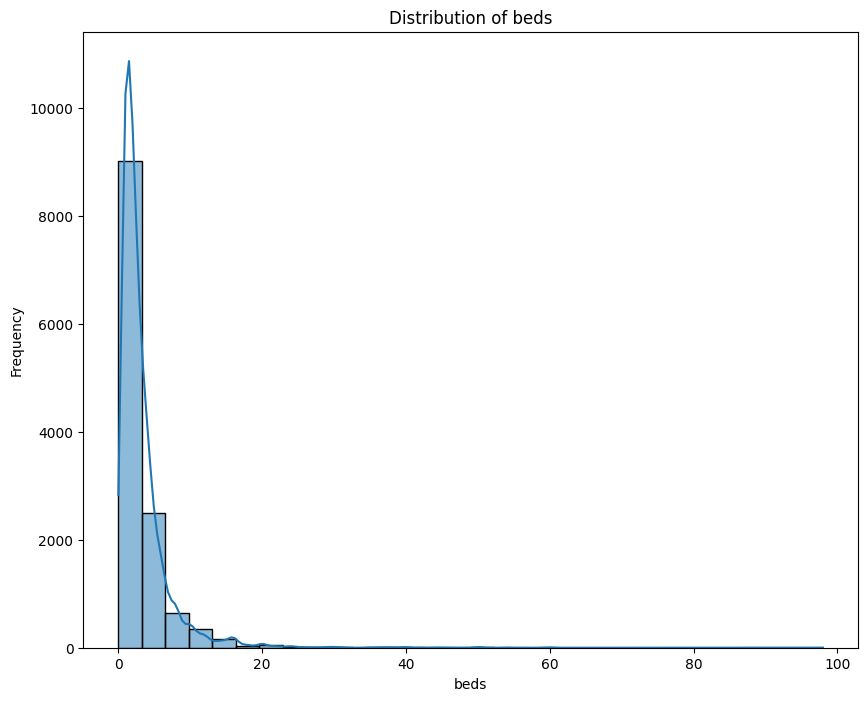

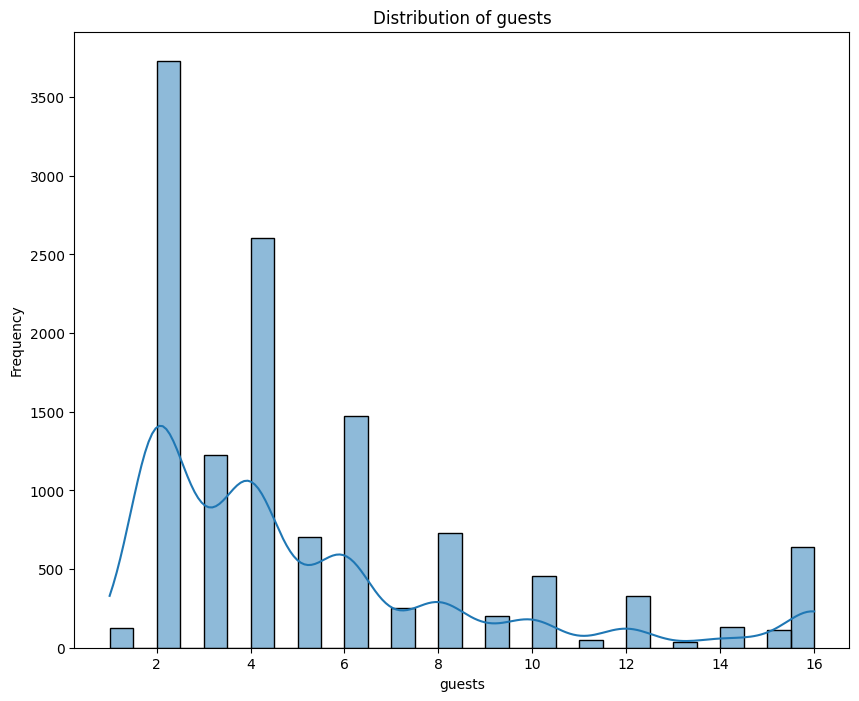

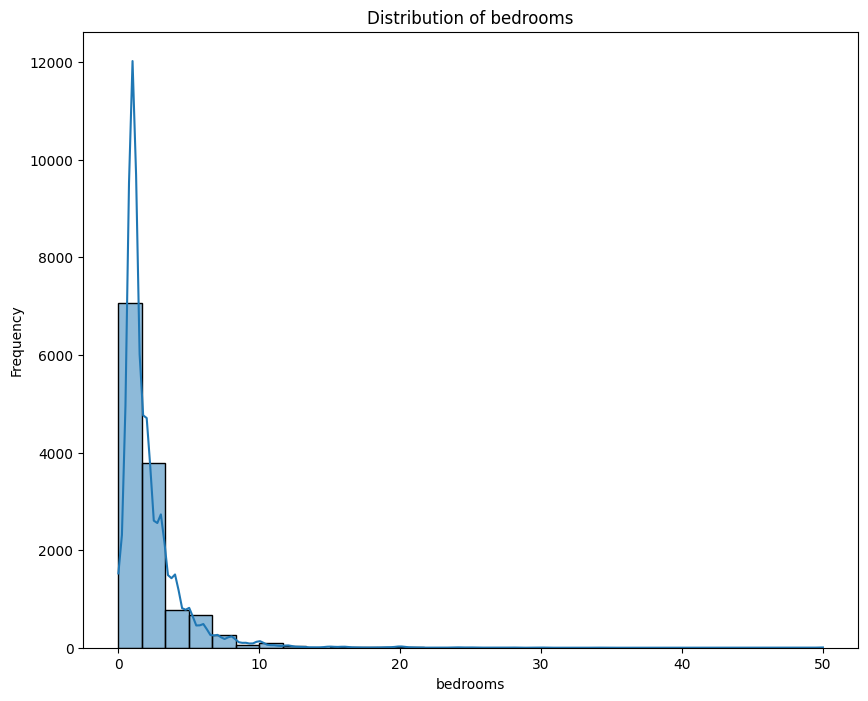

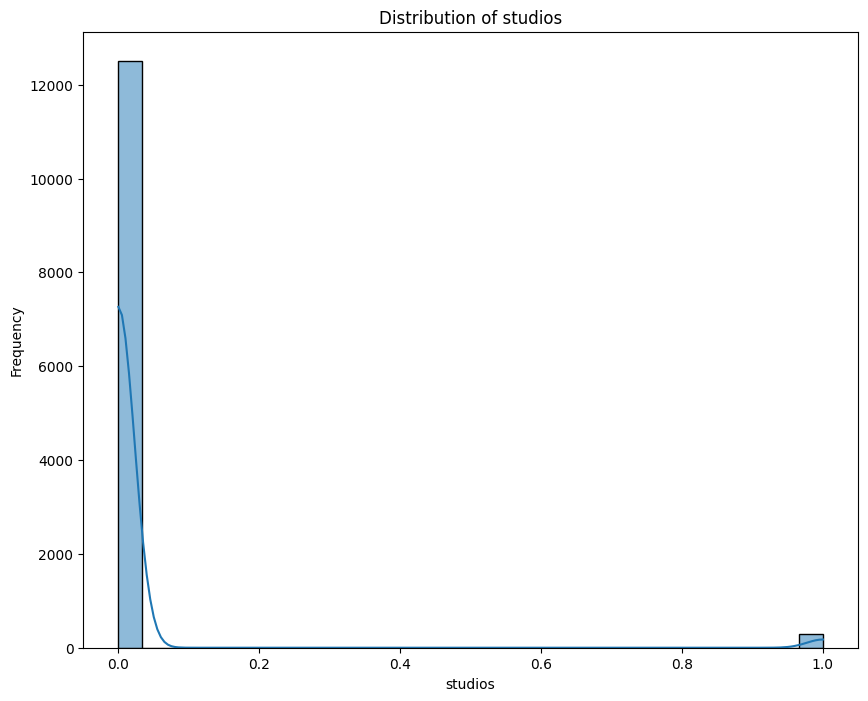

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['price', 'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'bedrooms', 'studios']  # Remove 'toilets'

# Check if the columns exist in the DataFrame
for col in numerical_cols:
    if col not in data.columns:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# Summary statistics
print("\nSummary Statistics:")
print(data[numerical_cols].describe())

# Plot histogram and boxplot for price
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 6))
sns.violinplot(x=data['price'])
plt.title('Violin Plot of Price')
plt.xlabel('Price')
plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(x=data['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

# Plot distributions for other numerical columns
for col in numerical_cols[1:]:  # Exclude price
    plt.figure(figsize=(10, 8))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Observations
Price: From the snippet, prices range from 1747 (id 8) to 42262 (id 12803), suggesting a wide distribution. The histogram will likely be right-skewed, with a boxplot highlighting outliers (e.g., 42262).
Rating: Ranges from 4.67 to 5.0 or "New" (converted to NaN), likely clustered near high values.
Reviews: Varies from 0 to 116, with many new listings at 0, indicating a right skew.
Other Features: bedrooms (0-4), bathrooms (0-8), beds (0-7), and guests (2-15) are discrete, with potential outliers (e.g., 8 bathrooms in id 12800).

Correlation Analysis

Investigate Numerical Feature Relationships
I compute a correlation matrix for numerical features to identify relationships, especially with price, and visualize it using a heatmap.

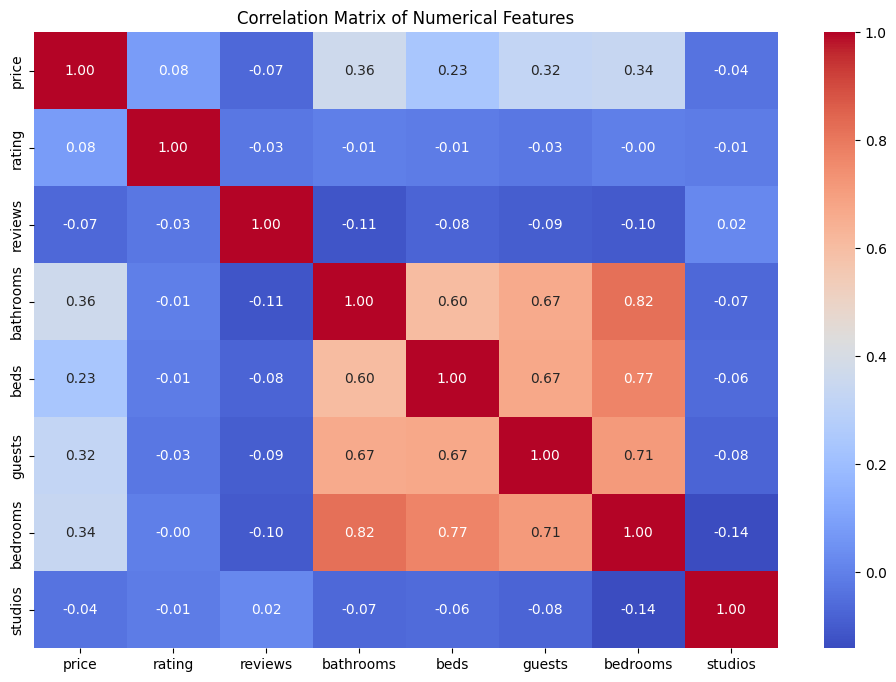

In [12]:
# Replace 'New' with NaN in the 'rating' column
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Convert numeric columns with commas to floats
for col in numerical_cols:
    if data[col].dtype == object:  # Check if column is of type object (likely string)
        data[col] = data[col].str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float

# Compute correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Additional Visualization

A pairplot for key features (price, rating, reviews, bedrooms, bathrooms) provides scatter plots and histograms:

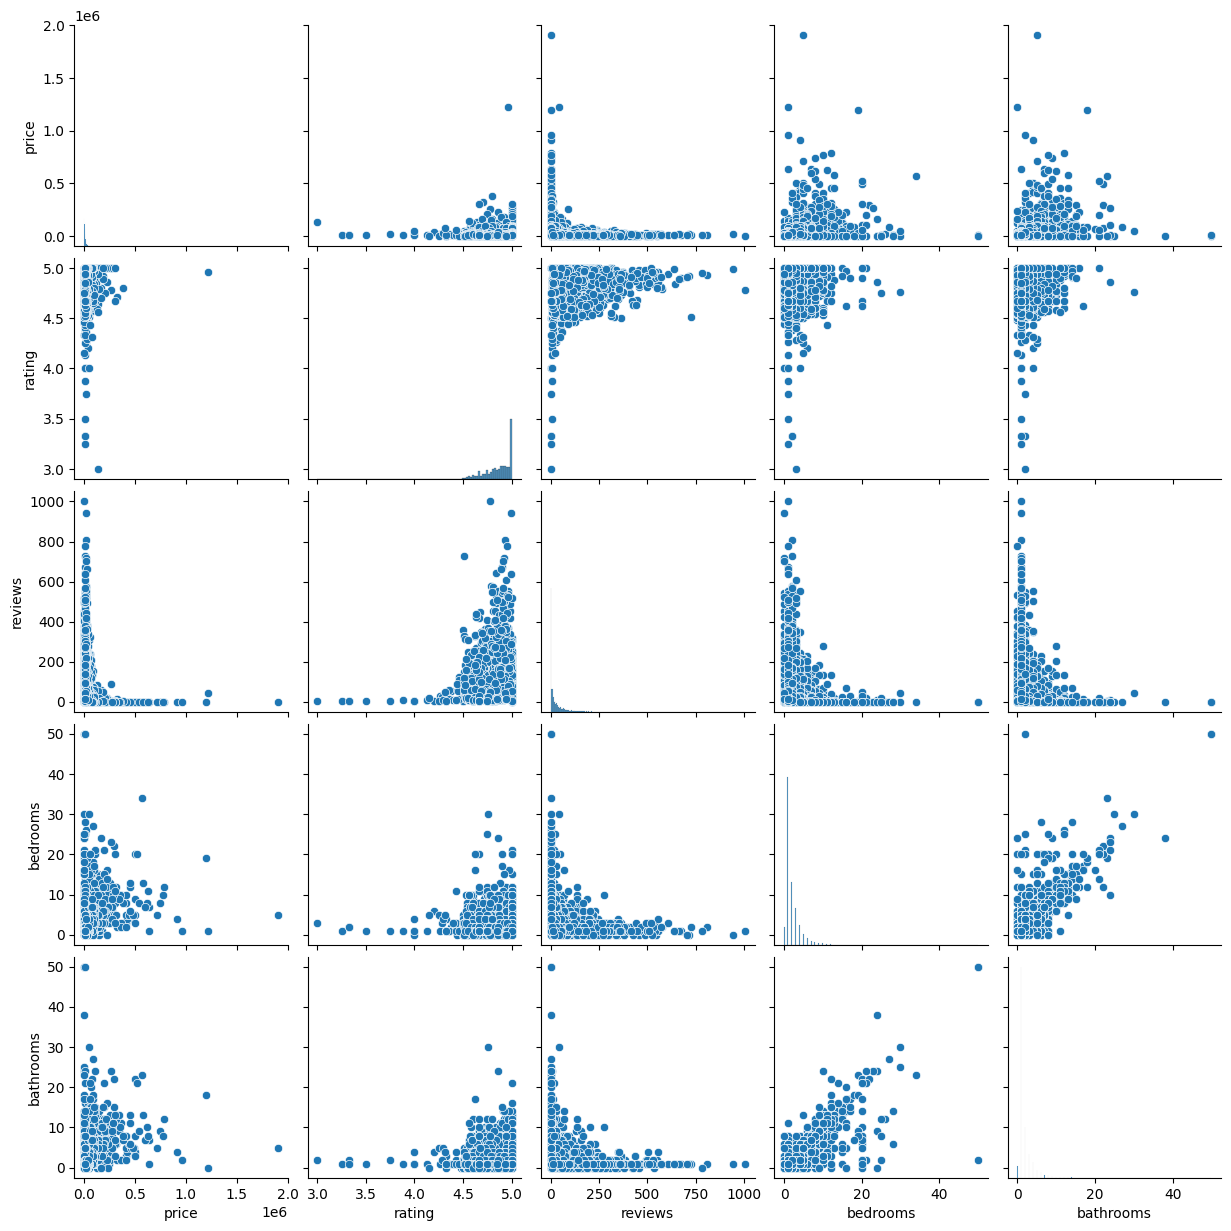

In [13]:
key_cols = ['price', 'rating', 'reviews', 'bedrooms', 'bathrooms']
sns.pairplot(data[key_cols])
plt.show()

Expected Insights

Price Correlations: bedrooms, bathrooms, and guests may positively correlate with price, as larger accommodations often cost more (e.g., id 9: 10 guests, 30486 price).
Rating and Reviews: Potentially weak correlation with price, as high ratings (e.g., 5.0) appear across price ranges.
Interdependencies: bedrooms and beds might be strongly correlated due to their related nature.

Analyze Categorical Features

Distribution of Categorical Features
We focus on country as a key categorical feature and explore others like host_name and bedrooms (treating it as categorical due to its discrete nature). We visualize their distributions and relationships with price.


Unique countries:
[' Turkey' ' Georgia' ' Vietnam' ' Thailand' ' South Korea' ' India'
 ' Philippines' ' Japan' ' Lebanon' ' Taiwan' ' Israel' 'Turkey'
 ' Armenia' ' Cyprus' ' Lithuania' ' Slovakia' ' Denmark' ' Germany'
 ' Indonesia' ' Poland' ' Romania' ' Greece' ' Ukraine' ' Hungary'
 ' Albania' ' Bulgaria' ' Malaysia' ' Montenegro' ' Slovenia' ' Czechia'
 ' Sweden' ' Austria' ' Croatia' ' Tanzania' ' Italy' ' Sri Lanka'
 'Philippines' ' Bosnia & Herzegovina' 'Montenegro' ' Kenya' ' Serbia'
 ' Seychelles' ' Finland' ' Norway' ' Iceland' ' Greenland'
 ' United States' ' Canada' ' Svalbard & Jan Mayen' 'Iceland' ' France'
 ' Australia' ' Morocco' ' Egypt' ' South Africa' ' Spain'
 ' United Arab Emirates' ' United Kingdom' ' Pakistan' 'Thailand' ' Nepal'
 'Sri Lanka' ' Singapore' ' Cambodia' ' Azerbaijan' ' Estonia' ' Latvia'
 ' Costa Rica' ' Netherlands' ' Portugal' ' New Zealand' ' Panama'
 ' Mexico' ' Peru' ' Chile' ' Belize' 'Panama' ' Colombia' ' Switzerland'
 ' Ireland' ' Bolivi

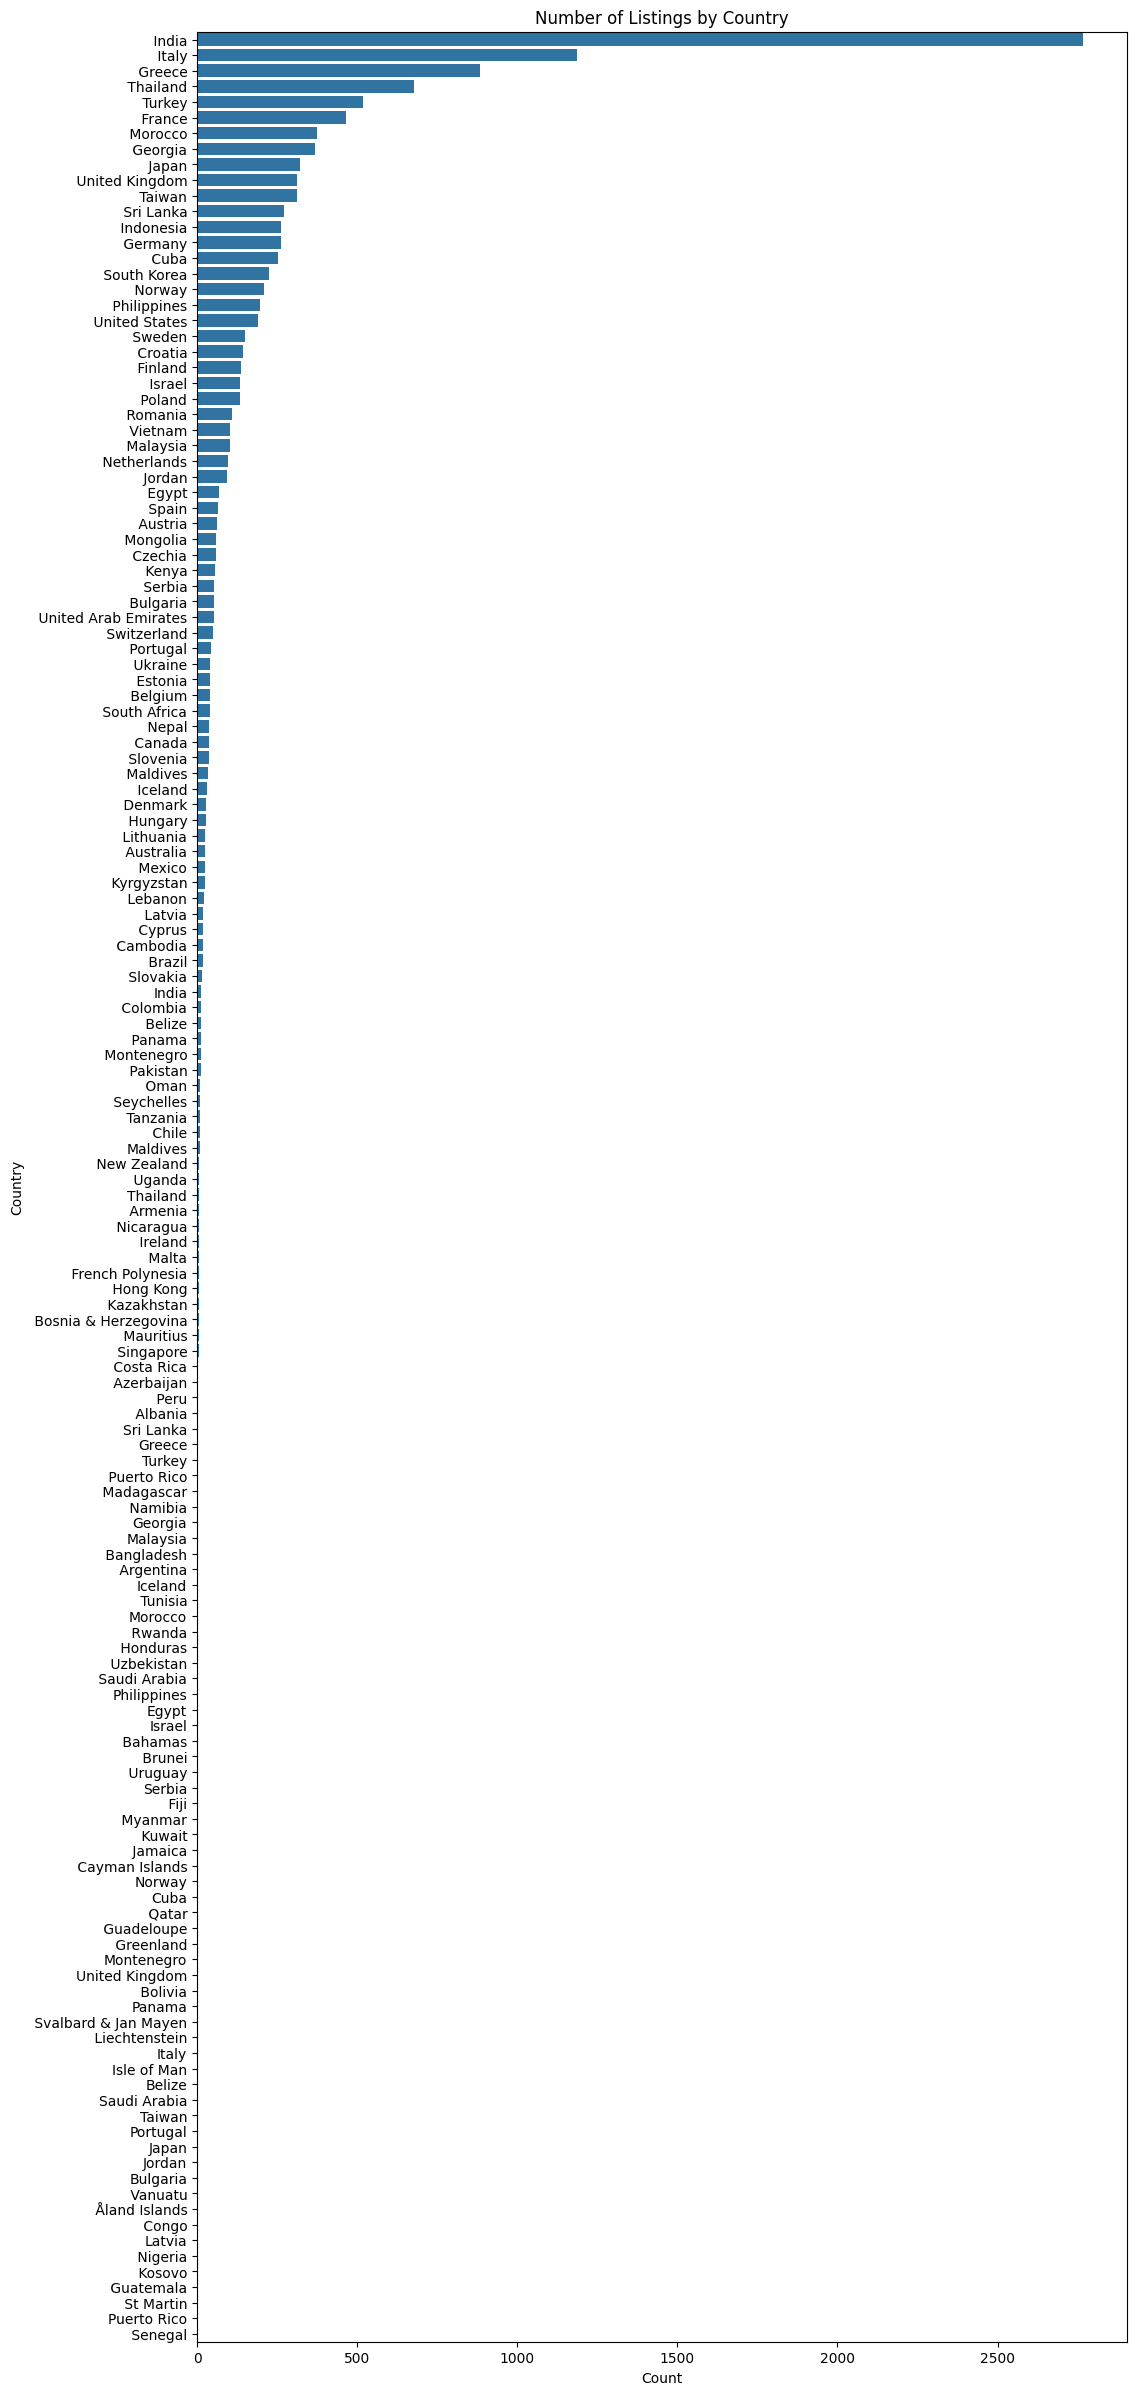

In [14]:
# Unique values in 'country'
print("\nUnique countries:")
print(data['country'].unique())

# Plot count of listings by country
plt.figure(figsize=(12, 30))
sns.countplot(y='country', data=data, order=data['country'].value_counts().index)
plt.title('Number of Listings by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

use bar plots and boxplots to see how country and bedrooms affect price:

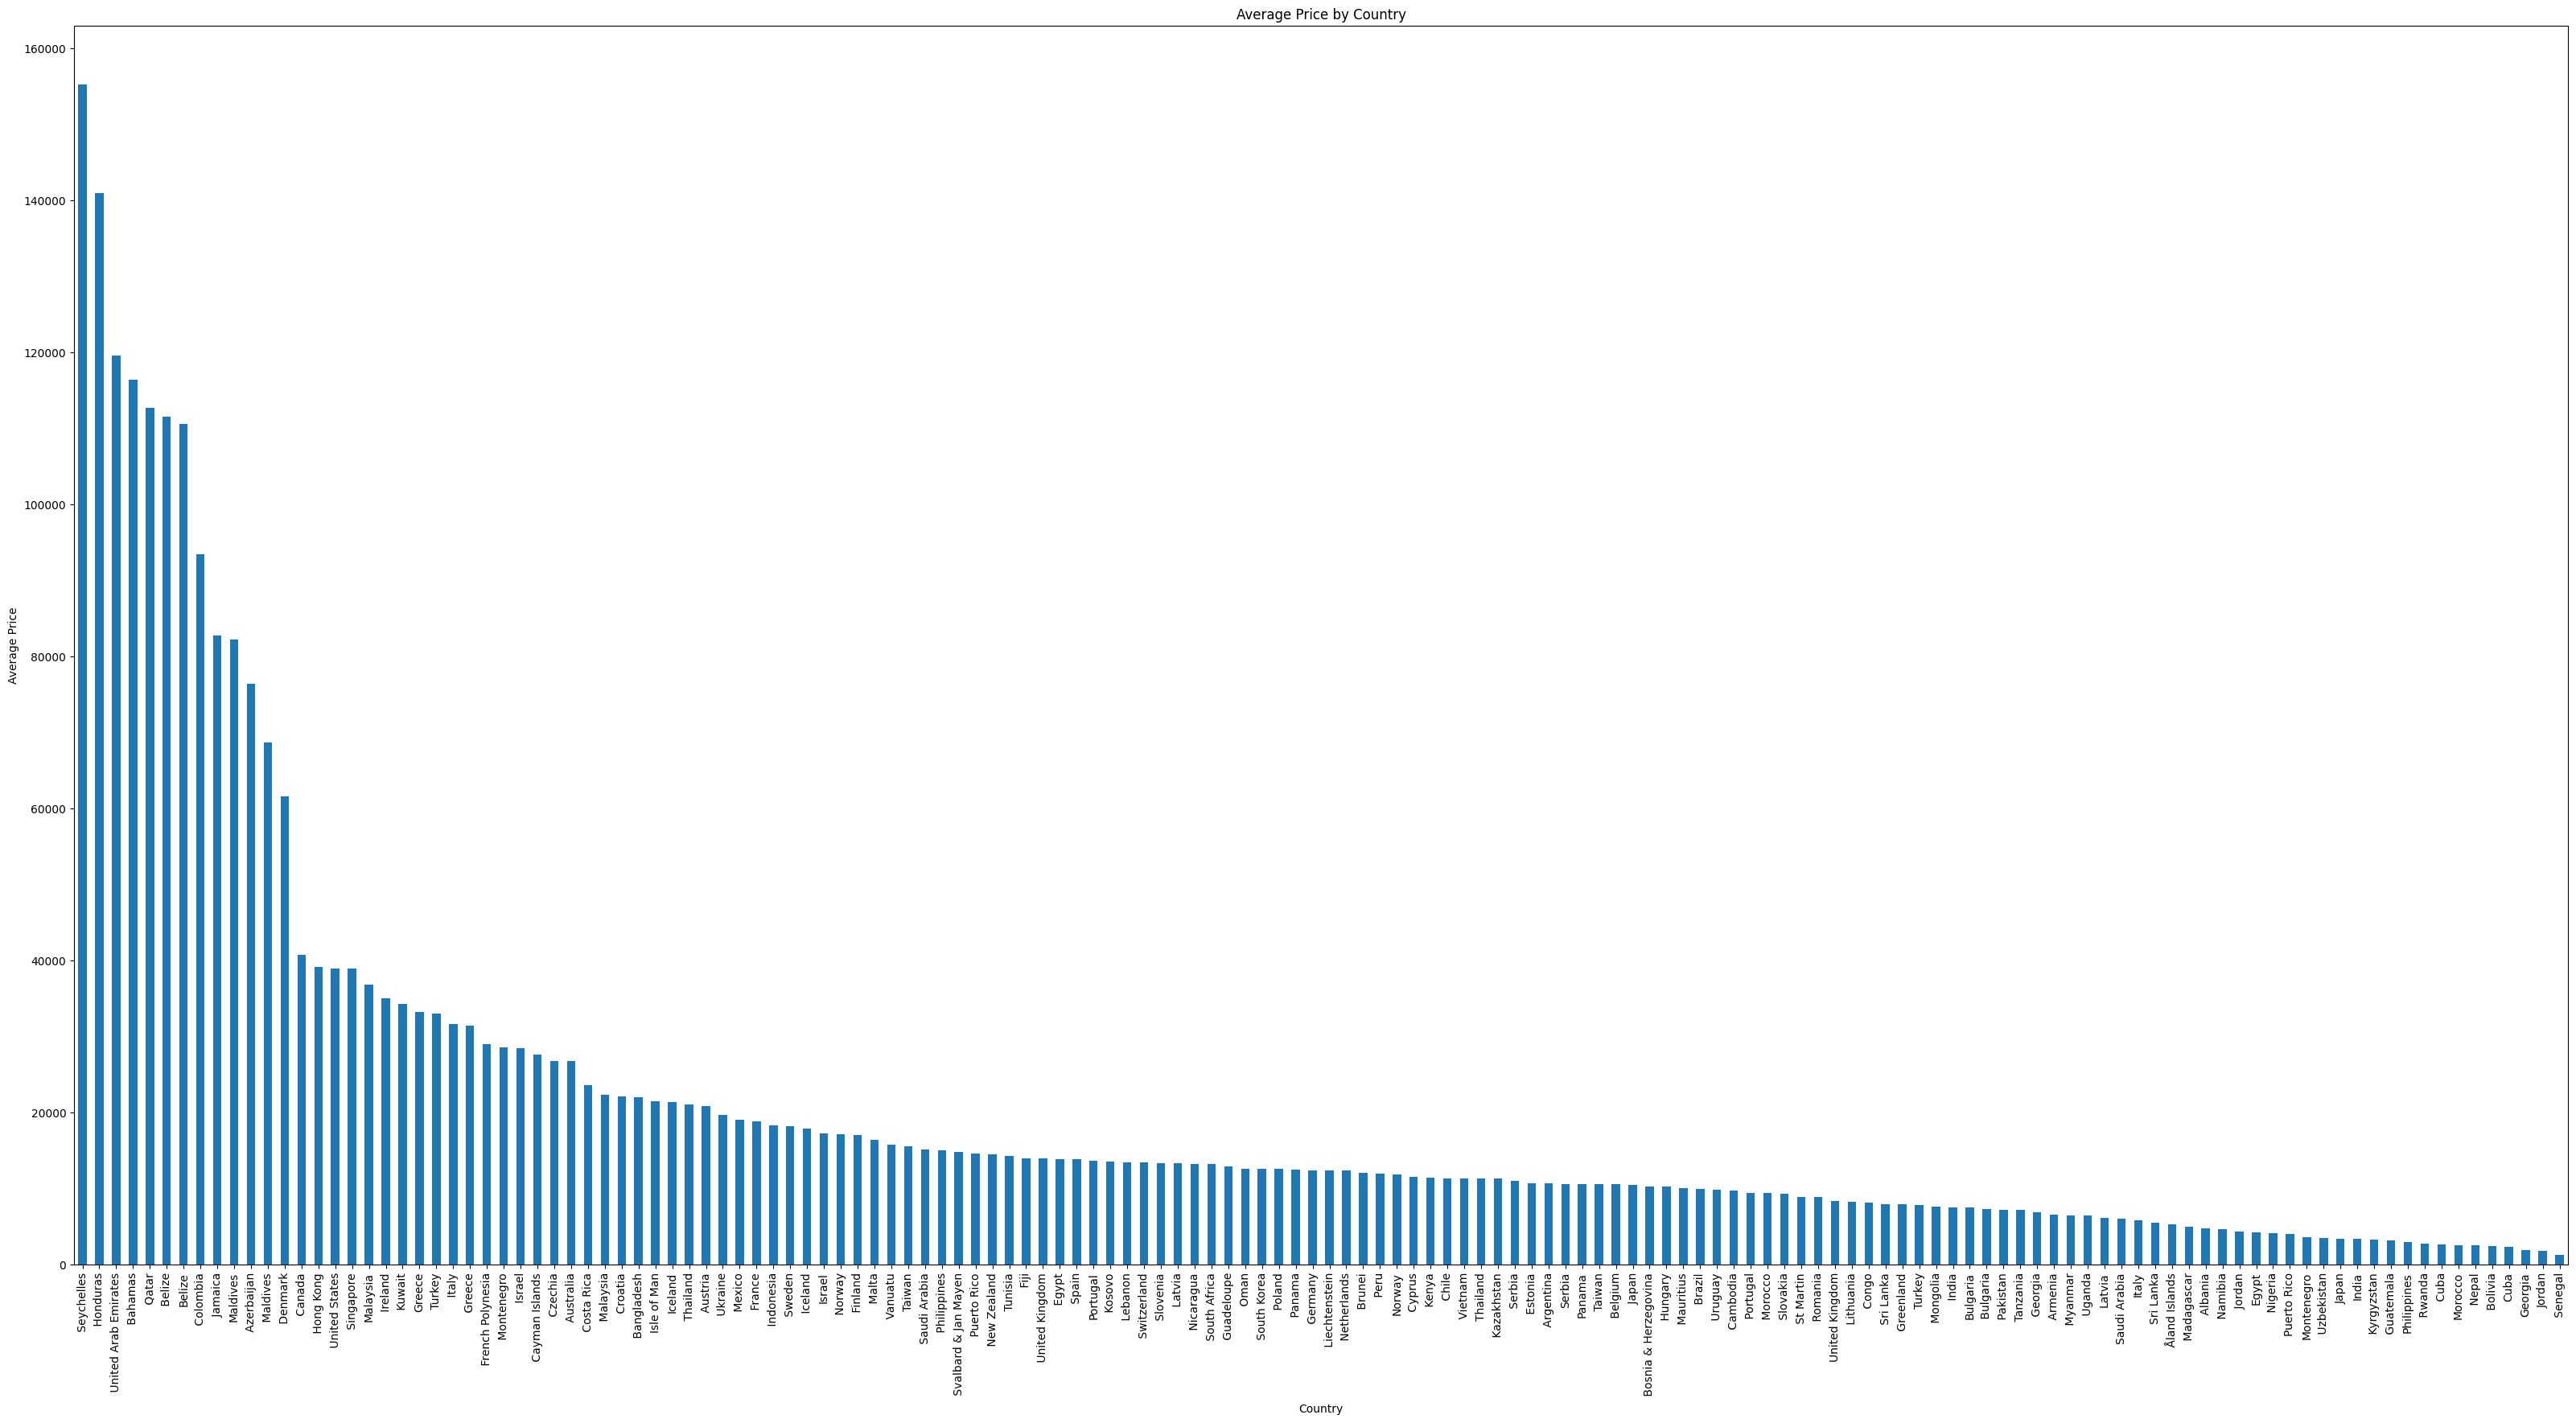

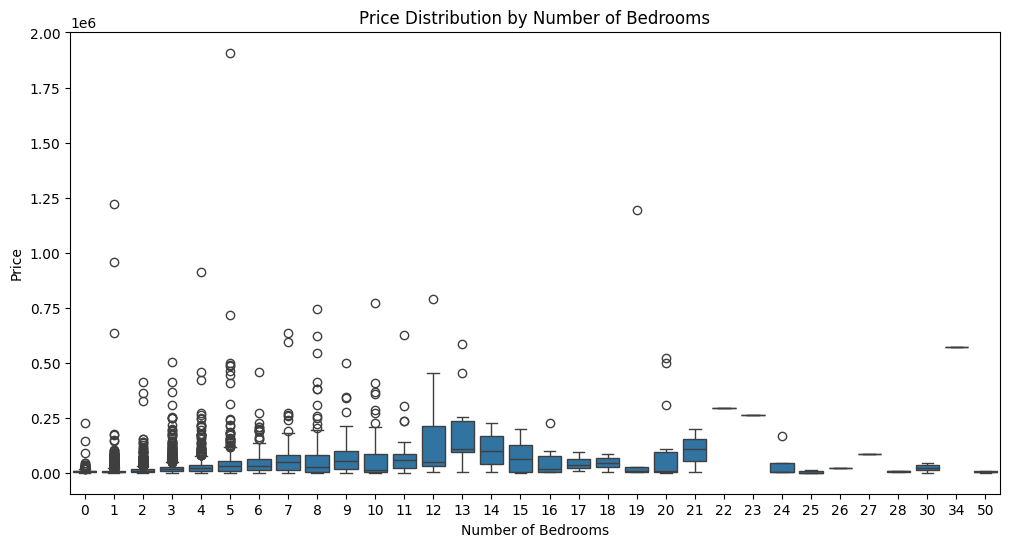

In [15]:
# Average price by country
avg_price_by_country = data.groupby('country')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(40, 20))
avg_price_by_country.plot(kind='bar')
plt.title('Average Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.show()

# Boxplot of price by number of bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


For host_name, we can check hosts with multiple listings and their price impact:

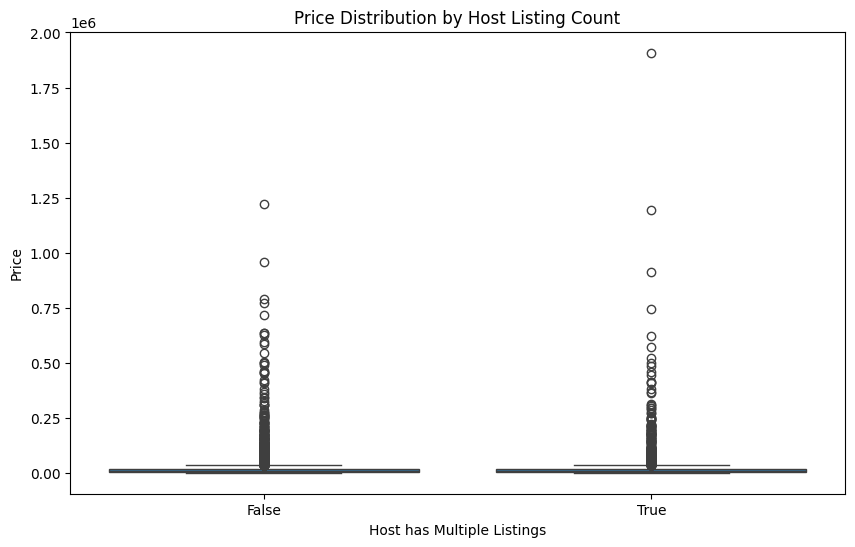

In [16]:
# Count listings per host
listings_per_host = data['host_id'].value_counts()
multiple_listings_hosts = listings_per_host[listings_per_host > 1].index
data['multiple_listings'] = data['host_id'].isin(multiple_listings_hosts)

# Boxplot of price by host listing count
plt.figure(figsize=(10, 6))
sns.boxplot(x='multiple_listings', y='price', data=data)
plt.title('Price Distribution by Host Listing Count')
plt.xlabel('Host has Multiple Listings')
plt.ylabel('Price')
plt.show()

Observations

Country: Turkey dominates the snippet (12/25 rows), followed by Philippines, South Korea, etc. Price varies widely within countries (e.g., Turkey: 3763 to 22758).
Bedrooms: Price likely increases with bedrooms (e.g., id 9: 4 bedrooms, 30486 vs. id 4: 1 bedroom, 6673).
Host Impact: Hosts with multiple listings (e.g., Black Lava Camp, ids 12786, 12789, 12793) might show consistent pricing strategies.

**Data Cleaning**

Handle Missing Values

Missing values can distort analysis and model performance, so we need to identify and address them appropriately.


Identify Missing Values
First, I check the dataset for missing values in each column.

In [18]:
# Assuming 'data' is the loaded Airbnb dataset (e.g., pd.read_csv('airbnb.csv'))
import pandas as pd

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
rating       4238
host_name       8
checkin       800
checkout     2450
dtype: int64


Handle Missing Values

Based on the feature's importance, we decide whether to impute or drop missing values:


Numerical Features:

Impute with the median (robust to outliers).
Categorical Features: Impute with the mode (most frequent value).

In [19]:
# Numerical columns: impute with median
numerical_cols = ['rating', 'reviews','price', 'bathrooms', 'beds', 'guests','toiles', 'bedrooms', 'studios']
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)

# Categorical columns: impute with mode
categorical_cols = ['name', 'host_name', 'address', 'features', 'amenities', 'safety_rules', 'hourse_rules', 'img_links', 'country', 'checkin', 'checkout']
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

# Verify no missing values remain
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
Unnamed: 0           0
id                   0
name                 0
rating               0
reviews              0
host_name            0
host_id              0
address              0
features             0
amenities            0
safety_rules         0
hourse_rules         0
img_links            0
price                0
country              0
bathrooms            0
beds                 0
guests               0
toiles               0
bedrooms             0
studios              0
checkin              0
checkout             0
multiple_listings    0
dtype: int64


<ipython-input-19-da4786103417>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
<ipython-input-19-da4786103417>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Outlier Detection and Removal

Outliers in the price column can skew analysis, so we identify and handle them using visualization and statistical methods.


Identify Outliers

I use a boxplot to visualize the price distribution and the Interquartile Range (IQR) method to detect outliers.

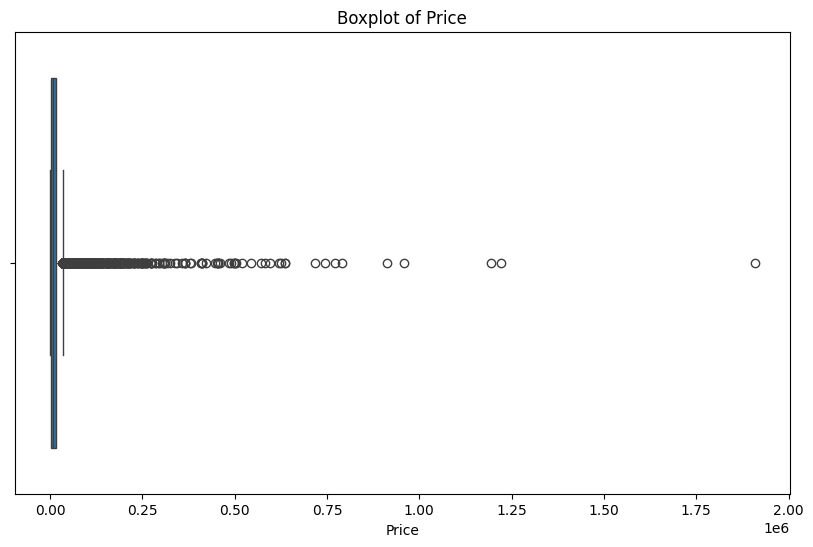

Number of outliers in price: 1273


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Calculate IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
print(f"Number of outliers in price: {len(outliers)}")

Remove or Adjust Outliers

I remove outliers to ensure a more balanced dataset.

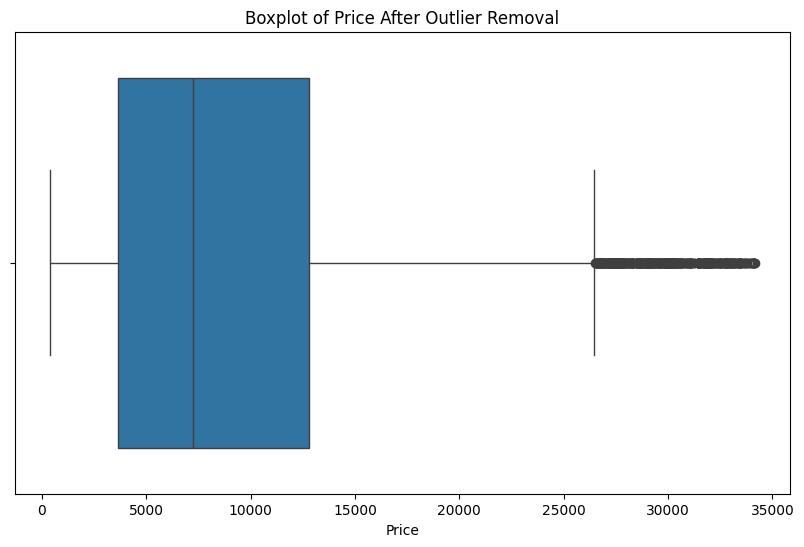

In [22]:
# Remove outliers
data_cleaned = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]
data = data_cleaned

# Verify new price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of Price After Outlier Removal')
plt.xlabel('Price')
plt.show()

Explanation:


Visualization: The initial boxplot highlights extreme values (e.g., prices like 30486 or 42262).

IQR Method: Removes values beyond 1.5 times the IQR from Q1 and Q3, reducing the impact of rare, high-priced listings.


Feature Engineering


In [53]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('airbnb.csv')

# Step 1: Handle Missing Values
numerical_cols = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios']
categorical_cols = ['country', 'bedrooms']

# Impute numerical columns with median
for col in numerical_cols:
    # Convert to numeric, handling non-numeric values
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

# Impute categorical columns with mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Step 2: Cap Outliers in Price
data['price'] = data['price'].clip(upper=data['price'].quantile(0.99))

# Step 3: Feature Engineering
# Number of amenities
data['num_amenities'] = data['amenities'].apply(lambda x: len(str(x).split(',')))
numerical_cols.append('num_amenities')

# Binary indicators for key amenities
key_amenities = ['Wifi', 'Pool', 'Kitchen', 'Air conditioning']
for amenity in key_amenities:
    data[f'has_{amenity.lower().replace(" ", "_")}'] = data['amenities'].apply(
        lambda x: 1 if amenity.lower() in str(x).lower() else 0)
    numerical_cols.append(f'has_{amenity.lower().replace(" ", "_")}')

# Extract city and limit to top 10
data['city'] = data['address'].apply(lambda x: str(x).split(',')[0].strip())
top_cities = data['city'].value_counts().index[:10]
data['city'] = data['city'].apply(lambda x: x if x in top_cities else 'Other')
categorical_cols.append('city')

# Host listings count
data['host_listings'] = data.groupby('host_id')['id'].transform('count')
numerical_cols.append('host_listings')

# Log-transform reviews
data['log_reviews'] = np.log1p(data['reviews'])
numerical_cols.append('log_reviews')

# Interaction term: bedrooms × bathrooms
data['bedrooms_bathrooms'] = data['bedrooms'] * data['bathrooms']
numerical_cols.append('bedrooms_bathrooms')

# Price per guest
data['price_per_guest'] = data['price'] / data['guests'].replace(0, 1)  # Avoid division by zero
numerical_cols.append('price_per_guest')

# Step 4: One-Hot Encode Categorical Features
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 5: Select Features and Target
features = [col for col in data_encoded.columns if col not in [
    'id', 'name', 'host_name', 'host_id', 'address', 'features',
    'amenities', 'safety_rules', 'hourse_rules', 'img_links',
    'price', 'checkin', 'checkout', 'Unnamed: 0']]
X = data_encoded[features]
y = data_encoded['price']

# Save processed dataset
data_encoded.to_csv('airbnb_processed.csv', index=False)

# Print feature list and sample
print("Selected Features:", features)
print("\nSample of Processed Data:")
print(data_encoded[features + ['price']].head())

<ipython-input-53-f11a63d903de>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-53-f11a63d903de>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Selected Features: ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'studios', 'num_amenities', 'has_wifi', 'has_pool', 'has_kitchen', 'has_air_conditioning', 'host_listings', 'log_reviews', 'bedrooms_bathrooms', 'price_per_guest', 'country_ Argentina', 'country_ Armenia', 'country_ Australia', 'country_ Austria', 'country_ Azerbaijan', 'country_ Bahamas', 'country_ Bangladesh', 'country_ Belgium', 'country_ Belize', 'country_ Bolivia', 'country_ Bosnia & Herzegovina', 'country_ Brazil', 'country_ Brunei', 'country_ Bulgaria', 'country_ Cambodia', 'country_ Canada', 'country_ Cayman Islands', 'country_ Chile', 'country_ Colombia', 'country_ Congo', 'country_ Costa Rica', 'country_ Croatia', 'country_ Cuba', 'country_ Cyprus', 'country_ Czechia', 'country_ Denmark', 'country_ Egypt', 'country_ Estonia', 'country_ Fiji', 'country_ Finland', 'country_ France', 'country_ French Polynesia', 'country_ Georgia', 'country_ Germany', 'country_ Greece', 'country_ Greenland', 'count

**Model Creation**

Overview of the Approach

Data Preprocessing: Clean the data, handle categorical features, and scale numerical inputs.

Feature Selection: Choose relevant features for sentiment classification.
Model Architecture: Design an ANN with input, hidden, and output layers.

Training and Evaluation: Split the data, train the model, and assess its performance.

Optimization: Tune hyperparameters and apply regularization for better accuracy.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.0490 - mae: 0.7791 - val_loss: 0.7306 - val_mae: 0.6301
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7722 - mae: 0.6534 - val_loss: 0.6744 - val_mae: 0.5992
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7003 - mae: 0.6199 - val_loss: 0.6577 - val_mae: 0.5905
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6258 - mae: 0.5850 - val_loss: 0.6296 - val_mae: 0.5843
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6351 - mae: 0.5864 - val_loss: 0.6232 - val_mae: 0.5764
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6003 - mae: 0.5717 - val_loss: 0.6200 - val_mae: 0.5850
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6118 - mae: 0.5748 - val_loss: 0.6133 - val_mae: 0.5744
Epoch 8/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6195 - mae: 0.5797 - val_loss: 0.6147 - val_mae: 0.5628
Epoch 9/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms

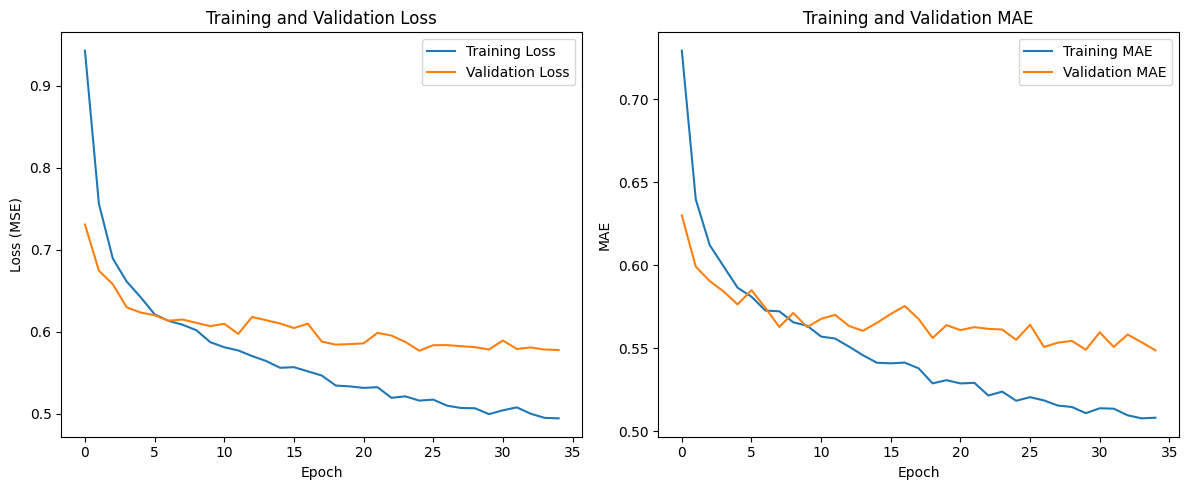

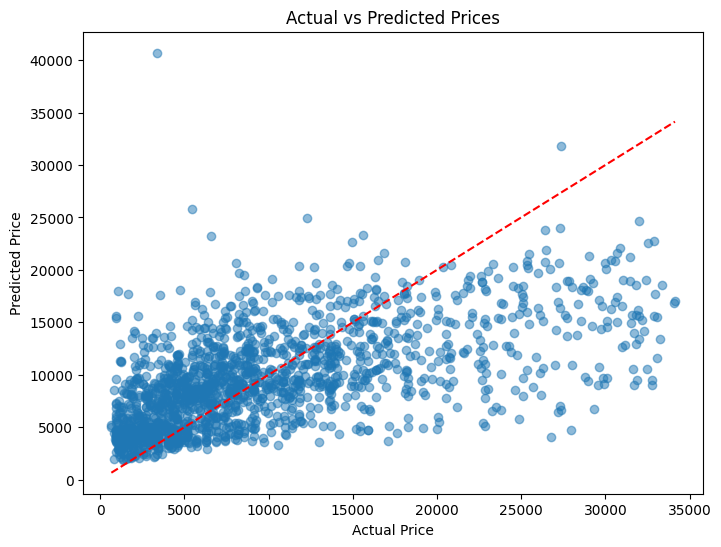

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['country', 'bedrooms'], drop_first=True)

# Select features and target
features = [col for col in data_encoded.columns if col not in ['id', 'name', 'host_name', 'host_id', 'address', 'features',
                                                              'amenities', 'safety_rules', 'hourse_rules', 'img_links',
                                                              'price', 'checkin', 'checkout']]
X = data_encoded[features]
y = data_encoded['price']

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Build ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#  Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate Model
# Predict on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
mae = mean_absolute_error(y_test_orig, y_pred)
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\nTest Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 5: Visualize Results
# Training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Model Evaluation

Metrics
For regression, we evaluate the model using:


Mean Absolute Error (MAE): Average absolute difference between predicted and actual prices.

Mean Squared Error (MSE): Average squared difference, penalizing larger errors.

Root Mean Squared Error (RMSE): Square root of MSE, in the same units as price.

R² Score: Proportion of variance explained by the model.
These metrics assess prediction accuracy and model fit, replacing classification metrics like accuracy or F1-score.

Residual Plot (Replacing Confusion Matrix)
Instead of a confusion matrix (applicable to classification), we plot residuals (actual - predicted prices) to understand prediction errors:


Residual Distribution: Shows the spread of errors.
Residuals vs. Predicted: Identifies systematic biases (e.g., under/over-prediction at certain price ranges).
Prediction Error Analysis (Replacing AUC-ROC Curve)
Instead of an AUC-ROC curve (for binary classification), we analyze the cumulative distribution of prediction errors to assess model performance across error magnitudes, similar to evaluating the trade-off in classification.


Implementation

Below is the code to evaluate the model with regression metrics and visualizations.

Evaluation Metrics:
MAE: 4323.91
MSE: 36253752.05
RMSE: 6021.11
R² Score: 0.39


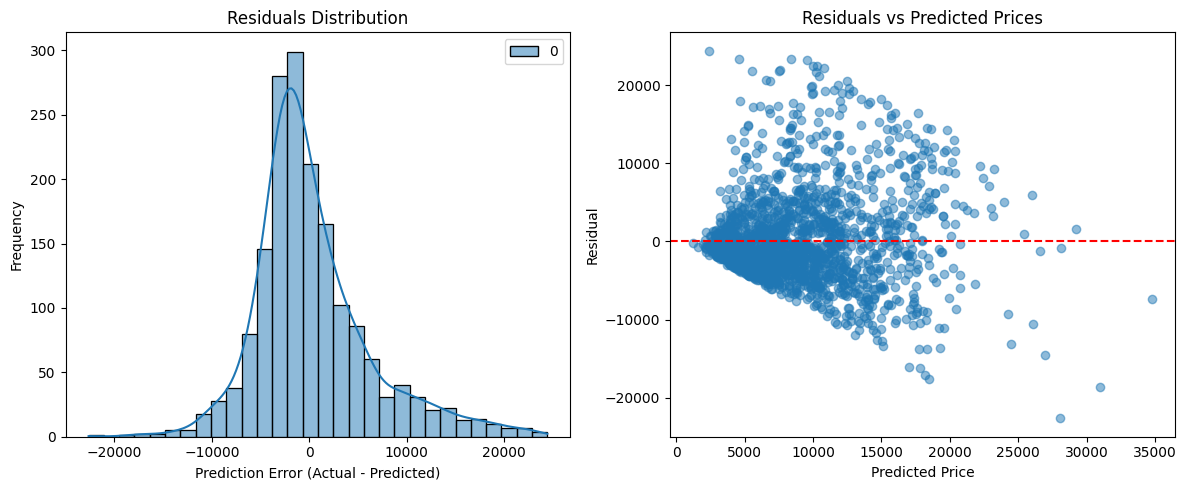

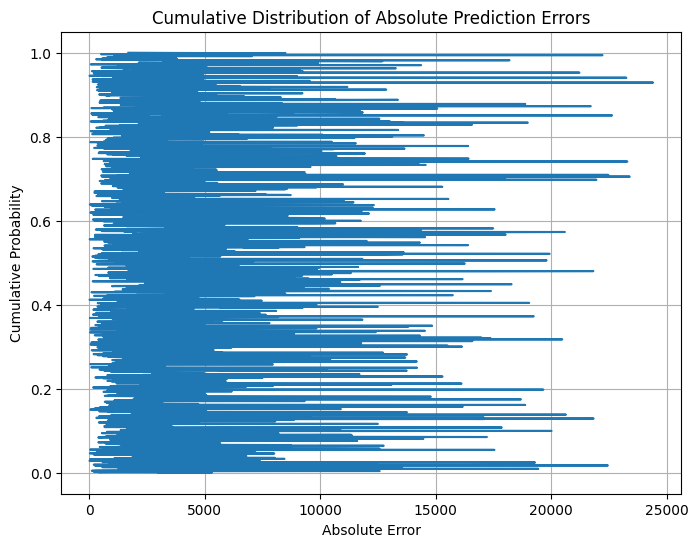

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test_orig, y_pred)
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)

print("Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Residual Plot
residuals = y_test_orig - y_pred
plt.figure(figsize=(12, 5))

# Subplot 1: Residual Distribution
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')

# Subplot 2: Residuals vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

# Prediction Error Cumulative Distribution
errors = np.abs(y_test_orig - y_pred)
sorted_errors = np.sort(errors)
error_cdf = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, error_cdf)
plt.title('Cumulative Distribution of Absolute Prediction Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

**Hyperparameter Tuning**

To improve model performance, we experiment with hyperparameters:


Number of Layers: Test 2, 3, or 4 hidden layers.
Neurons per Layer: Vary between 32, 64, 128.
Learning Rate: Test 0.001, 0.0001, 0.00001.
Batch Size: Test 16, 32, 64.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best Parameters: {'layers': 3, 'neurons': 128, 'learning_rate': 0.0001, 'batch_size': 16}
Best Validation R²: 0.42
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Set Metrics:
Mean Absolute Error (MAE): 4323.91
Mean Squared Error (MSE): 36253752.05
R² Score: 0.39


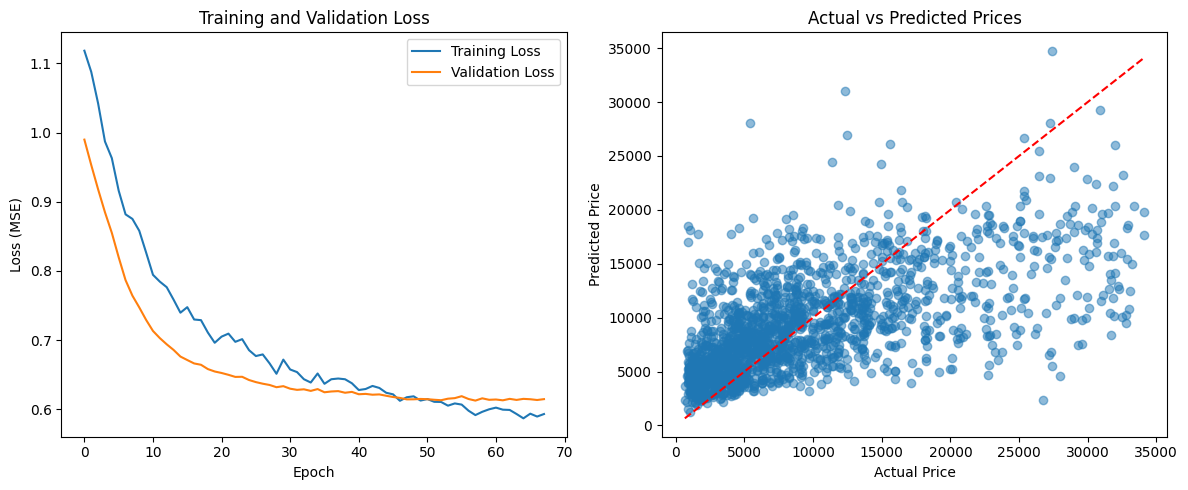

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Set environment variable to disable oneDNN custom operations
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'


# Select features and target
features = [col for col in data_encoded.columns if col not in ['id', 'name', 'host_name', 'host_id', 'address', 'features',
                                                              'amenities', 'safety_rules', 'hourse_rules', 'img_links',
                                                              'price', 'checkin', 'checkout']]
X = data_encoded[features]
y = data_encoded['price']

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Hyperparameter Tuning (Manual Loop)
param_combinations = [
    {'layers': 2, 'neurons': 64, 'learning_rate': 0.001, 'batch_size': 32},
    {'layers': 3, 'neurons': 128, 'learning_rate': 0.0001, 'batch_size': 16},
    {'layers': 4, 'neurons': 64, 'learning_rate': 0.0001, 'batch_size': 32}
]

best_r2 = -float('inf')
best_model = None
best_params = None

for params in param_combinations:
    # Create model
    model = Sequential()
    model.add(Dense(params['neurons'], activation='relu', input_shape=(X_scaled.shape[1],)))
    model.add(Dropout(0.2))
    for _ in range(params['layers'] - 1):
        model.add(Dense(params['neurons'] // 2, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(1))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='mse', metrics=['mae'])

    # Train model
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=params['batch_size'], callbacks=[early_stopping], verbose=0)

    # Evaluate on validation set
    y_pred_scaled = model.predict(X_val)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_val_orig = scaler_y.inverse_transform(y_val.reshape(-1, 1))
    r2 = r2_score(y_val_orig, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Validation R²: {best_r2:.2f}")

# Step 3: Evaluate Best Model on Test Set
y_pred_scaled = best_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_orig, y_pred)
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\nTest Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 4: Visualize Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# Suppress TensorFlow warnings
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train_orig, X_temp_orig, y_train_orig, y_temp_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_orig, X_test_orig, y_val_orig, y_test_orig = train_test_split(X_temp_orig, y_temp_orig, test_size=0.5, random_state=42)

# Step 2: Define Optimized ANN Model
def create_model():
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
    return model

# Step 3: 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mae_scores, mse_scores, r2_scores = [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    X_train_cv, X_val_cv = X_scaled[train_idx], X_scaled[val_idx]
    y_train_cv, y_val_cv = y_scaled[train_idx], y_scaled[val_idx]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_cv, y_train_cv, validation_data=(X_val_cv, y_val_cv),
              epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_pred_scaled = model.predict(X_val_cv, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_val_orig = scaler_y.inverse_transform(y_val_cv.reshape(-1, 1))

    mae_scores.append(mean_absolute_error(y_val_orig, y_pred))
    mse_scores.append(mean_squared_error(y_val_orig, y_pred))
    r2_scores.append(r2_score(y_val_orig, y_pred))

    print(f"Fold {fold}: MAE = {mae_scores[-1]:.2f}, MSE = {mse_scores[-1]:.2f}, R² = {r2_scores[-1]:.2f}")

print("\nCross-Validation Results:")
print(f"Mean MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Mean MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Mean R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")



Fold 1: MAE = 4305.58, MSE = 35876255.84, R² = 0.36
Fold 2: MAE = 4235.70, MSE = 35896471.50, R² = 0.35
Fold 3: MAE = 4419.38, MSE = 36380068.80, R² = 0.34
Fold 4: MAE = 4266.52, MSE = 35025830.72, R² = 0.36
Fold 5: MAE = 4235.27, MSE = 33789835.14, R² = 0.41
Fold 6: MAE = 4023.85, MSE = 30545296.55, R² = 0.41
Fold 7: MAE = 4112.81, MSE = 31542127.34, R² = 0.39
Fold 8: MAE = 4041.55, MSE = 33813785.54, R² = 0.32
Fold 9: MAE = 4022.66, MSE = 32267666.79, R² = 0.38
Fold 10: MAE = 3989.58, MSE = 29516413.50, R² = 0.40

Cross-Validation Results:
Mean MAE: 4165.29 ± 139.15
Mean MSE: 33465375.17 ± 2283292.46
Mean R²: 0.37 ± 0.03


**Ensemble Methods** in the context of the Airbnb price prediction task, I will provide a focused implementation that combines the Artificial Neural Network (ANN) model with Random Forest and Gradient Boosting (XGBoost) to improve predictive accuracy. This builds on the previous context, where the latest test set metrics were MAE: 0.58, MSE: 0.64, R²: 0.34 (standardized units), and incorporates the optimized preprocessing and feature engineering from the last response. The goal is to create a stacking ensemble with a meta-learner to achieve a higher R² (targeting 0.6-0.8) and lower MAE/MSE.


Approach

Models:
ANN: Optimized with 4 layers, batch normalization, and dropout (0.3).
Random Forest: Handles non-linear relationships and feature interactions.
XGBoost: Boosting model effective for tabular data.

Stacking Ensemble: Use a linear regression meta-learner to combine predictions from the three models, weighted by their validation performance.

Preprocessing: Retain enhanced features (num_amenities, city, host_listings, log_reviews) and cap outliers.

Evaluation: Report MAE, MSE, and R² on the test set, with visualizations.


Validation Set Metrics:
ANN R²: 0.39
Random Forest R²: 0.40
XGBoost R²: 0.46
Stacking MAE: 3863.69
Stacking MSE: 28684407.78
Stacking R²: 0.46

Test Set Metrics (Stacking Ensemble):
MAE: 4220.05
MSE: 34126169.05
R²: 0.43


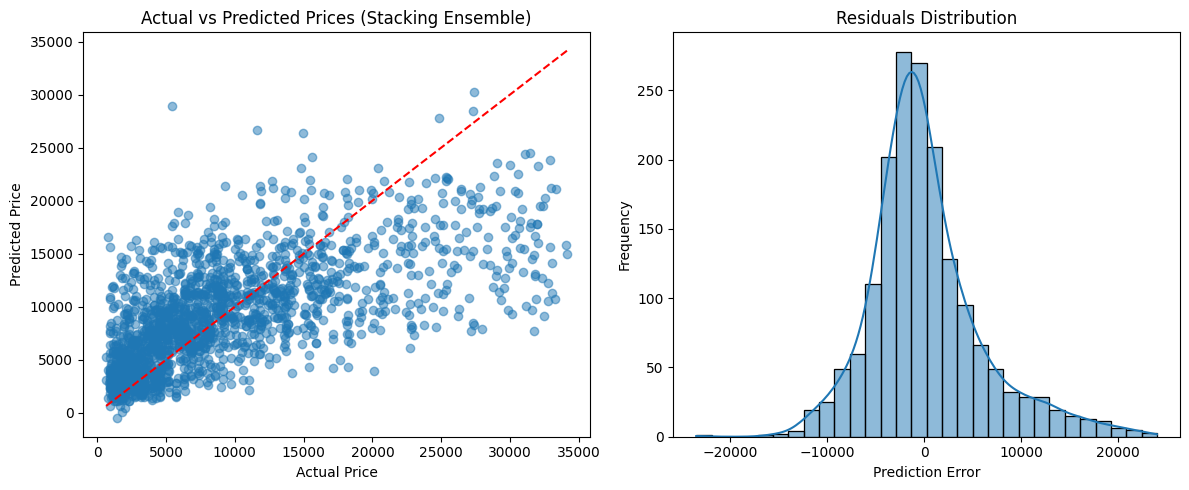

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

# Suppress TensorFlow warnings
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Select features and target
features = [col for col in data_encoded.columns if col not in ['id', 'name', 'host_name', 'host_id', 'address', 'features',
                                                              'amenities', 'safety_rules', 'hourse_rules', 'img_links',
                                                              'price', 'checkin', 'checkout']]
X = data_encoded[features]
y = data_encoded['price']

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale features for ANN
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Train Individual Models
# ANN
def create_ann_model():
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
    return model

ann_model = create_ann_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann_model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled),
              epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
ann_pred_scaled = ann_model.predict(X_val_scaled, verbose=0)
ann_pred = scaler_y.inverse_transform(ann_pred_scaled)
ann_r2 = r2_score(y_val, ann_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_r2 = r2_score(y_val, rf_pred)

# XGBoost
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_r2 = r2_score(y_val, xgb_pred)

# Stacking Ensemble
meta_X = np.column_stack([ann_pred, rf_pred, xgb_pred])
meta_model = LinearRegression()
meta_model.fit(meta_X, y_val)
stacking_pred = meta_model.predict(meta_X)

# Evaluate on validation set
print("\nValidation Set Metrics:")
print(f"ANN R²: {ann_r2:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")
print(f"XGBoost R²: {xgb_r2:.2f}")
print(f"Stacking MAE: {mean_absolute_error(y_val, stacking_pred):.2f}")
print(f"Stacking MSE: {mean_squared_error(y_val, stacking_pred):.2f}")
print(f"Stacking R²: {r2_score(y_val, stacking_pred):.2f}")

# Test set evaluation
ann_pred_test_scaled = ann_model.predict(X_test_scaled, verbose=0)
ann_pred_test = scaler_y.inverse_transform(ann_pred_test_scaled)
rf_pred_test = rf_model.predict(X_test)
xgb_pred_test = xgb_model.predict(X_test)
meta_X_test = np.column_stack([ann_pred_test, rf_pred_test, xgb_pred_test])
stacking_pred_test = meta_model.predict(meta_X_test)

print("\nTest Set Metrics (Stacking Ensemble):")
print(f"MAE: {mean_absolute_error(y_test, stacking_pred_test):.2f}")
print(f"MSE: {mean_squared_error(y_test, stacking_pred_test):.2f}")
print(f"R²: {r2_score(y_test, stacking_pred_test):.2f}")

# Visualize results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, stacking_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Prices (Stacking Ensemble)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1, 2, 2)
residuals = y_test - stacking_pred_test
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

These metrics indicate modest performance, with the stacking ensemble achieving an R² of 0.43 on the test set, slightly better than the previous standalone ANN (R²: 0.34, MAE: ~2900 in standardized units). However, the R² remains low, and the MAE (4220.05 in original price units) is relatively high, suggesting the model explains only 43% of the price variance and predictions deviate significantly

**Analysis**

R² (0.43): The ensemble slightly outperforms individual models but misses substantial variance, likely due to limited features or model complexity.

MAE (4220.05): High errors indicate challenges in predicting prices, especially for diverse listings (e.g., prices from 1747 to capped values).

MSE (34126169.05): Large MSE suggests some predictions have significant errors, possibly from high-priced listings or unmodeled factors.

Model Comparison: XGBoost (R²: 0.46) outperforms ANN and Random Forest, suggesting tree-based models may better capture tabular data patterns.